# Investigating An IMDB 10,000 Movies Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this data set we will be exploring an IMDB 10,000 movies list collected from the movie data base (TMDB) including user ratings and revenues.


>We will investigate some general insights like:

* Number of movies per year trend
* Revenues Mean of movies per year trend
* Which movies has the highest/lowest popularity?
* Which movies has the highest/lowest avarge rating?
* Which movies has the highst/lowest gross profit (Revenue - Budget) ignoring inflation over time?
* Which genres are most popular from year to year?
* Who is the most popular and profitable director?
> Also some properties associated with movies that have high revenues/gross profit:
* Average runtime?
* genres that are most profitable?
* Most profitable Month

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### Assessing

In [2]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#checking Dimension
df.shape

(10866, 21)

In [5]:
#Checking general properties
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
#Checking general properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#Check for duplicats
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [8]:
#Check for movies without a director
df[df['director'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,...,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,NaN,-,...,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,NaN,NaN,...,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,http://www.freetoplaythemovie.com,NaN,One game will change their lives.,...,Follow three professional video game players a...,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,NaN,NaN,...,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,NaN,NaN,...,Called the most accurate adaptation of Anne Fr...,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,tt1532957,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,http://www.paathefilm.com/,NaN,NaN,...,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [9]:
#Checking genres
df['genres'].value_counts()

Drama                                       712
Comedy                                      712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
Comedy|Romance                              268
Horror|Thriller                             259
Horror                                      253
Comedy|Drama|Romance                        222
Drama|Thriller                              138
Comedy|Family                               102
Action|Thriller                             101
Thriller                                     93
Drama|Comedy                                 92
Animation|Family                             90
Crime|Drama|Thriller                         81
Crime|Drama                                  74
Comedy|Horror                                72
Drama|Comedy|Romance                         64
Action                                       63
Action|Comedy                           

In [10]:
#Checking Music genres
df[df['genres'] == 'Music'] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1168,290382,tt3970482,0.163139,0,0,Roger Waters: The Wall,Roger Waters,http://rogerwatersthewall.com/,Sean Evans|Roger Waters,NaN,...,A concert film that the former Pink Floyd sing...,133,Music,Dolby|Rue 21 Productions|Picture House Enterta...,9/29/14,25,6.9,2014,0.000000e+00,0.000000e+00
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.000000e+00
2956,15157,tt1071358,0.938876,5000000,0,Another Cinderella Story,Selena Gomez|Jane Lynch|Katharine Isabelle|Emi...,http://anothercinderellastory.warnerbros.com/,Damon Santostefano,Once upon a time....can happen again.,...,A guy who danced with what could be the girl o...,90,Music,Warner Premiere|CS2 Films|Dylan Sellers Produc...,9/16/08,205,6.2,2008,5.063933e+06,0.000000e+00
3224,20313,tt1270491,0.224721,0,0,John Mayer: Where the Light Is Live in Los Ang...,John Mayer|Steve Jordan|Pino Palladino|David R...,NaN,NaN,NaN,...,Where The Light Is: John Mayer Live in Los Ang...,164,Music,NaN,7/1/08,16,8.5,2008,0.000000e+00,0.000000e+00
3365,22258,tt1321823,0.002475,0,0,Foo Fighters: Live at Wembley Stadium,Dave Grohl|Nate Mendel|Chris Shiflett|Pat Smea...,NaN,NaN,NaN,...,Foo Fighters captured over their two sold-out ...,120,Music,NaN,8/25/08,10,8.4,2008,0.000000e+00,0.000000e+00
3611,60405,tt1629440,0.451669,0,0,Sharpay's Fabulous Adventure,Ashley Tisdale|Austin Butler|Bradley Steven Pe...,NaN,Michael Lembeck,From the Producers of High School Musical,...,Just how fabulous do you have to be to make it...,90,Music,Walt Disney Pictures|Disney Channel|Blondie Gi...,4/19/11,62,5.0,2011,0.000000e+00,0.000000e+00
3670,79931,tt2122272,0.355400,0,0,Adele - Live at the Royal Albert Hall,Adele|Jo Allen|Stephanie Cavey,http://www.adele.tv/rah/,Paul Dugdale,A live performance at the Royal Albert Hall in...,...,Live At The Royal Albert Hall was recorded on ...,99,Music,Columbia Music Video,11/27/11,20,7.4,2011,0.000000e+00,0.000000e+00
3737,63513,tt1843961,0.107454,0,0,Lady Gaga - Presents The Monster Ball Tour at ...,Lady Gaga,http://www.hbo.com/lady-gaga-presents-the-mons...,Laurieann Gibson,Paws Up,...,Lady Gaga Presents: The Monster Ball Tour at M...,117,Music,Home Box Office (HBO),11/21/11,17,7.7,2011,0.000000e+00,0.000000e+00
4849,140405,tt2471670,0.118043,0,0,Coldplay: Live 2012,Chris Martin,http://coldplay.com/cinema/,Paul Dugdale,NaN,...,Coldplay Live 2012 is the band's first concert...,97,Music,EMI Records Ltd.,11/13/12,16,7.5,2012,0.000000e+00,0.000000e+00
4973,10028,tt0322589,1.635524,18000000,62646763,Honey,Jessica Alba|Mekhi Phifer|Joy Bryant|Romeo Mil...,NaN,Bille Woodruff,Her dream. Her terms,...,Honey Daniels (Jessica Alba) dreams of making ...,94,Music,Universal Pictures|Marc Platt Productions|NuAm...,11/24/03,156,6.0,2003,2.133635e+07,7.425851e+07


### Outputs (Assessment Summary):

##### Quality aspects:

###### - completeness issues:
* Movies Without a director
* Duplicated records
* Some Budgets, Revenues, Runtime, and Ratings are Zeros instead of null values
* Titles that are not movies Like: 'Adele - Live at the Royal Albert Hall', We will drop the music genres as all of our questions are about only movies

###### Data types (consistency issues):
* The release date column is not in date format.


### Cleaning

In [11]:
# Copying dataset
df_clean = df.copy()

##### Define
* Remove Duplicated records.
* All Zeros will be replaced with NaNs.
* Change scientific notation for numbers.
* Change date column to date format.
* Remove Music records.

#### Code

In [12]:
#Remove Duplicated records.
df_clean = df_clean.drop_duplicates()

In [13]:
#Zeros will be replaced with NaNs.
df_clean = df_clean.replace(0,np.nan)

In [14]:
#Change date column to date format.
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

In [15]:
#Remove Music records.
df_clean = df_clean[df_clean['genres'] != 'Music'] 

In [16]:
#Adding needed columns for both Gross Profit & release month
df_clean['release_month'] = df_clean['release_date'].dt.month
df_clean['gross_profit'] = df_clean['revenue'] - df_clean['budget']

#### Test

In [17]:
df_clean

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,gross_profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1.363529e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5,2.284364e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3,1.852382e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,1.868178e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1.316249e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,12,3.979505e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,6,2.856035e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,9,4.873803e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,6,1.082731e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,6,6.787086e+08


In [18]:
df_clean.duplicated().value_counts()

False    10842
dtype: int64

In [19]:
df_clean[df_clean['genres'] == 'Music'] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,gross_profit


<a id='eda'></a>
## Exploratory Data Analysis


### Number of movies per year trend

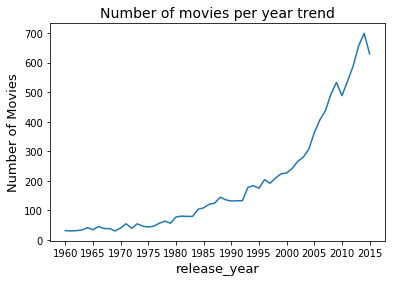

In [20]:
#Taking 5 years at a time this is the number of productions per year 
df_clean.groupby(['release_year']).original_title.count().plot(xticks = np.arange(1960,2020,5))

plt.title("Number of movies per year trend",fontsize = 14)
plt.xlabel('release_year',fontsize = 13)
plt.ylabel('Number of Movies',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")

### Revenues mean of movies per year trend

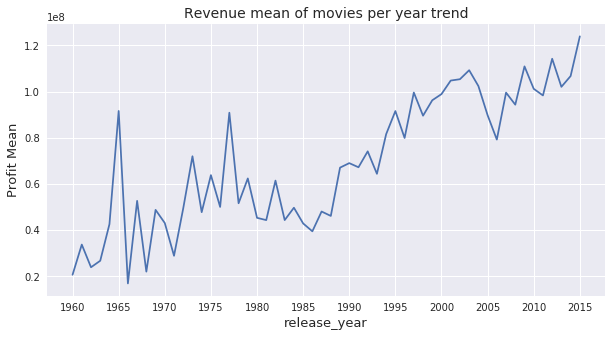

In [21]:
#Taking 5 years at a time this is the mean of revenues per year 
df_clean.groupby(['release_year']).revenue.mean().plot(xticks = np.arange(1960,2020,5))

plt.title("Revenue mean of movies per year trend",fontsize = 14)
plt.xlabel('release_year',fontsize = 13)
plt.ylabel('Profit Mean',fontsize = 13)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

### Which movies has the highest/lowest popularity?

In [22]:
#Creating a data frame of the top 10 popular movies

df_clean_top10 = df_clean.sort_values(['popularity'],ascending=False).head(10)

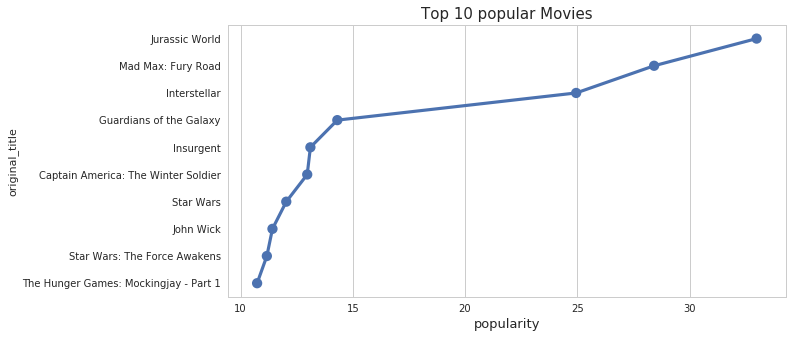

In [23]:
ax = sns.pointplot(x=df_clean_top10['popularity'],y=df_clean_top10['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 popular Movies",fontsize = 15)
ax.set_xlabel("popularity",fontsize = 13)
sns.set_style("darkgrid")

In [24]:
#Creating a data frame of the least 10 popular movies

df_clean_least10 = df_clean.sort_values(['popularity'],ascending=True).head(10)

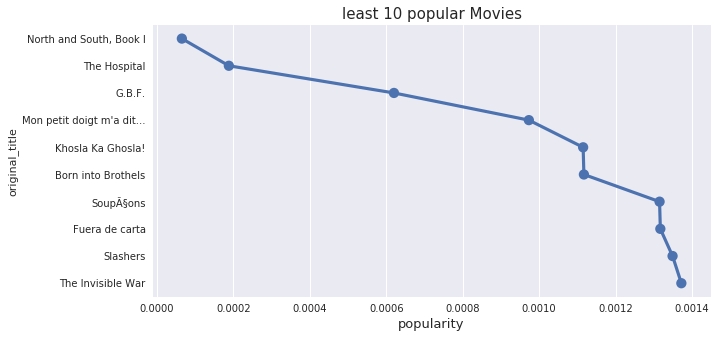

In [25]:
ax = sns.pointplot(x=df_clean_least10['popularity'],y=df_clean_least10['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("least 10 popular Movies",fontsize = 15)
ax.set_xlabel("popularity",fontsize = 13)
sns.set_style("darkgrid")

### Which movies has the highest/lowest avarge rating?

In [26]:
#Creating a data frame of the top 10 rated movies

df_clean_top10avg = df_clean.sort_values(['vote_average'],ascending=False).head(10)

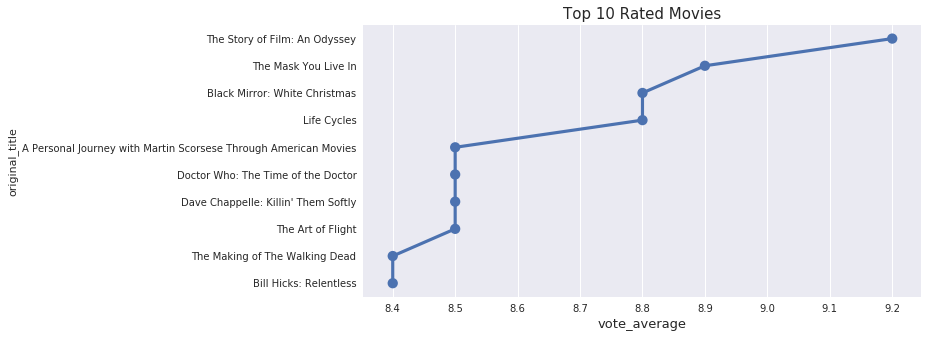

In [27]:
ax = sns.pointplot(x=df_clean_top10avg['vote_average'],y=df_clean_top10avg['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Rated Movies",fontsize = 15)
ax.set_xlabel("vote_average",fontsize = 13)
sns.set_style("darkgrid")

In [28]:
#Creating a data frame of the least 10 rated movies

df_clean_least10avg = df_clean.sort_values(['vote_average'],ascending=True).head(10)

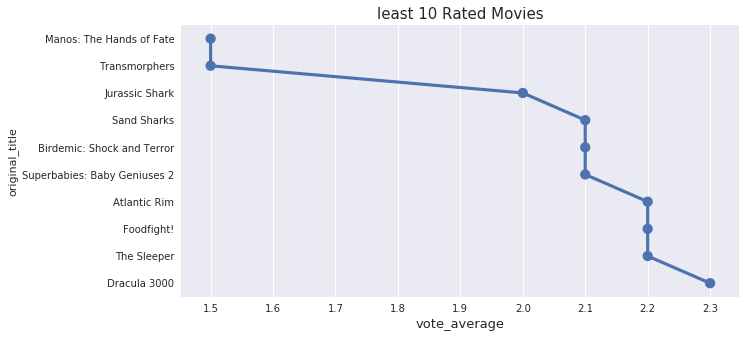

In [29]:
ax = sns.pointplot(x=df_clean_least10avg['vote_average'],y=df_clean_least10avg['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("least 10 Rated Movies",fontsize = 15)
ax.set_xlabel("vote_average",fontsize = 13)
sns.set_style("darkgrid")

### Which movies has the highst/lowest gross profit (Revenue - Budget) ignoring inflation over time?

In [30]:
#Creating a data frame of the highst  gross profit 10 movies

df_clean_highstgrossprofit = df_clean.sort_values(['gross_profit'],ascending=False).head(10)

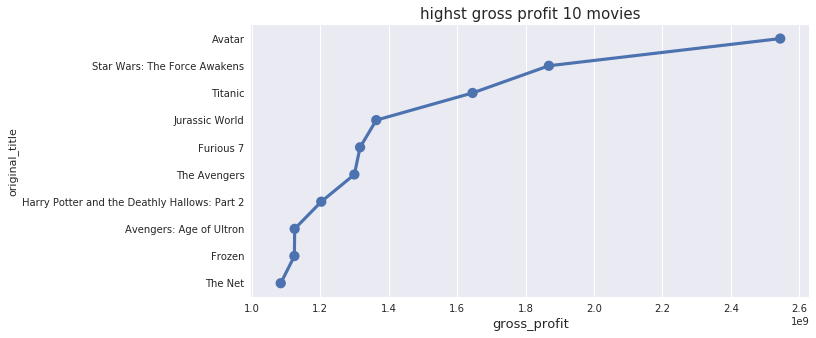

In [31]:
ax = sns.pointplot(x=df_clean_highstgrossprofit['gross_profit'],y=df_clean_highstgrossprofit['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("highst gross profit 10 movies",fontsize = 15)
ax.set_xlabel("gross_profit",fontsize = 13)
sns.set_style("darkgrid")

In [32]:
#Creating a data frame of the lowest gross profit 10 movies

df_clean_lowestgrossprofit = df_clean.sort_values(['gross_profit'],ascending=True).head(10)

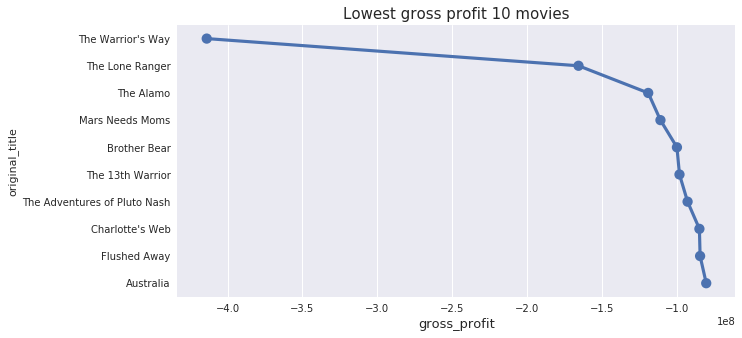

In [33]:
ax = sns.pointplot(x=df_clean_lowestgrossprofit['gross_profit'],y=df_clean_lowestgrossprofit['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Lowest gross profit 10 movies",fontsize = 15)
ax.set_xlabel("gross_profit",fontsize = 13)
sns.set_style("darkgrid")

### Which genres are most popular over time?
* For the mixed genres we will take the first one as the main one

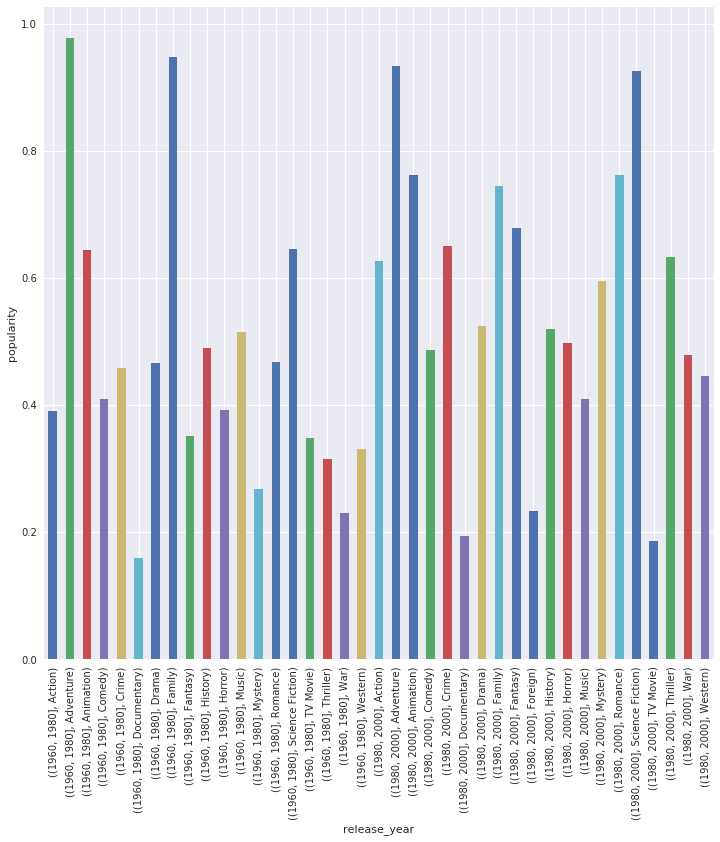

In [34]:
#Grouping by release year(20 years at a time) and the first genre of each movie then finding the mean popularity for each genre over time

df_clean.groupby([pd.cut(df_clean["release_year"], np.arange(1960,2020,20)),df_clean['genres'].str.split(pat='|', n= -1, expand=True)[0]]).popularity.mean().plot(kind='bar', figsize=(12,12))
plt.xlabel('release_year')
plt.ylabel('popularity');

### Who is the most popular and profitable director?

In [35]:
#most popular director
df_clean.groupby(['director']).popularity.sum().idxmax()

'Christopher Nolan'

In [36]:
#most profitable director
df_clean.groupby(['director']).revenue.sum().idxmax()

'Steven Spielberg'

### some properties associated with movies that have high revenues/gross profit

In [37]:
df_clean.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,gross_profit
id,1.000000,-0.014110,-0.075536,-0.040394,-0.078960,-0.035452,-0.058278,0.511450,-0.162814,-0.114897,0.041604,0.004612
popularity,-0.014110,1.000000,0.480072,0.629261,0.137429,0.800824,0.211173,0.090244,0.435394,0.561834,0.043495,0.596128
budget,-0.075536,0.480072,1.000000,0.688638,0.265364,0.580101,0.092222,0.215628,0.959129,0.534170,0.047098,0.526946
revenue,-0.040394,0.629261,0.688638,1.000000,0.237700,0.764070,0.206818,0.121977,0.657580,0.905302,0.043035,0.979141
runtime,-0.078960,0.137429,0.265364,0.237700,1.000000,0.162999,0.153031,-0.113108,0.329185,0.263985,0.070249,0.220152
vote_count,-0.035452,0.800824,0.580101,0.764070,0.162999,1.000000,0.255343,0.108364,0.523465,0.666656,0.026529,0.728296
vote_average,-0.058278,0.211173,0.092222,0.206818,0.153031,0.255343,1.000000,-0.118317,0.112419,0.242034,0.072017,0.259399
release_year,0.511450,0.090244,0.215628,0.121977,-0.113108,0.108364,-0.118317,1.000000,0.036887,-0.098285,-0.047227,0.088760
budget_adj,-0.162814,0.435394,0.959129,0.657580,0.329185,0.523465,0.112419,0.036887,1.000000,0.571005,0.074092,0.502167
revenue_adj,-0.114897,0.561834,0.534170,0.905302,0.263985,0.666656,0.242034,-0.098285,0.571005,1.000000,0.062095,0.906616


In [38]:
#Creating a data frame of the highst gross profit 10 movies

df_clean_runtimeprofit = df_clean.sort_values(['gross_profit'],ascending=False).head(10)

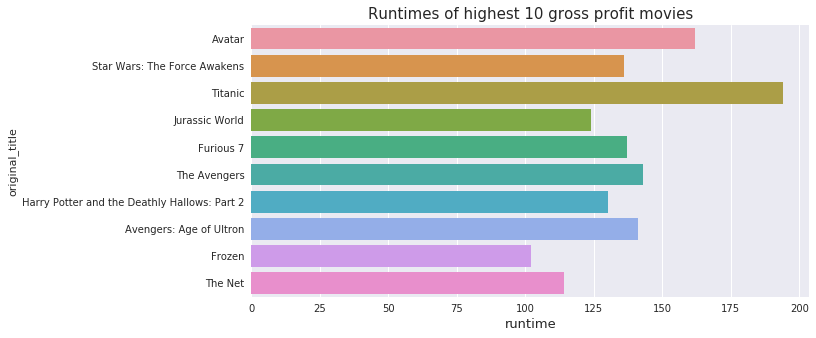

In [39]:
#plotting the runtime of each
ax = sns.barplot(x=df_clean_runtimeprofit['runtime'],y=df_clean_runtimeprofit['original_title'])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Runtimes of highest 10 gross profit movies",fontsize = 15)
ax.set_xlabel("runtime",fontsize = 13)
sns.set_style("darkgrid")

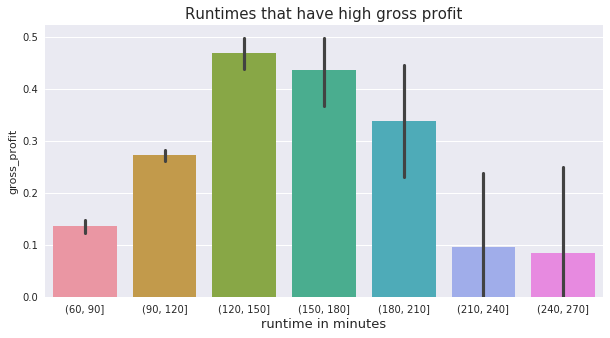

In [40]:
#plotting the runtime/gross profit
ax = sns.barplot(x=pd.cut(df_clean["runtime"], np.arange(60,300,30)),y=df_clean['gross_profit']> 0)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Runtimes that have high gross profit",fontsize = 15)
ax.set_xlabel("runtime in minutes",fontsize = 13)
sns.set_style("darkgrid")

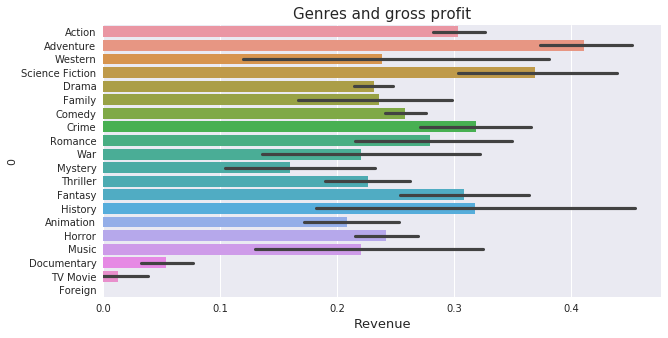

In [43]:
#genres that are most profitable
ax = sns.barplot(x=df_clean['gross_profit']> 0,y=df_clean['genres'].str.split(pat='|', n= -1, expand=True)[0])
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Genres and gross profit",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")

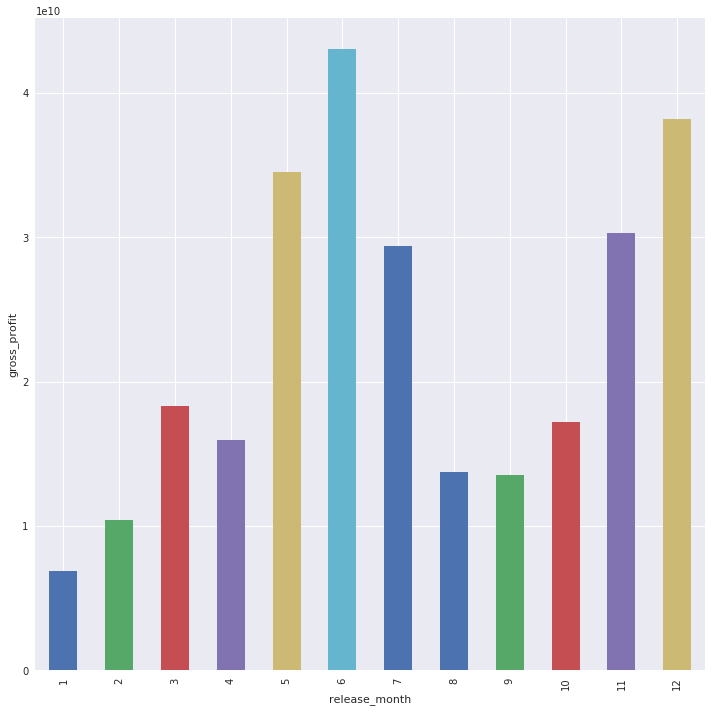

In [48]:
#Most profitable Month
df_clean.groupby(df_clean["release_month"]).gross_profit.sum().plot(kind='bar', figsize=(12,12))
plt.xlabel('release_month')
plt.ylabel('gross_profit');

<a id='conclusions'></a>
## Conclusions

>After cleaning the data here's some insights:
* Most popular film: Jurassic World
* Least popular film: North and South, Book 1
* Highest Average rating: The story of film: An Odyssey
* Least Average rating: Manos the hands of fate
* Highst gross profit: Avatar
* Lowest gross profit: The Warrior's way 
* Most popular genre over (1980-2000):  Adventure
* Most popular director:  Christopher Nolan
* most profitable director: Steven Spielberg


>Some properties associated with movies that have high revenues/gross profit:
* Runtime between 100-200 minutes
* Genres are adventure, crime and science fiction
* Release month during summer or Christmas (5,6,7,11,12)

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0